In [1]:
#importo le librerie
import pandas as pd
import numpy as np 
import random as rand
import pylab as plt
import io
import matplotlib.animation as animation
from tqdm.notebook import tqdm

In [2]:
# definisco la funzione che restituisce il raggio 
def R_ (a,P):
    return a*P**(1/3)

In [3]:
N=100   #numero particelle
m=10
prob1=[]   #probabilità uniforme compresa tra 0 e 1
prob2=[]
prob3=[]

for i in range (0,N):
    #random.seed(i) 
    prob1.append(rand.random())
    prob2.append(rand.random())
    prob3.append(rand.random())

theta=[]
phi=[]
R=[]

a=100
for i in range (0,N):
    R.append(R_(a,prob1[i]))
    theta.append(prob2[i]*2*np.pi)
    phi.append(np.arccos(1-2*prob3[i]) )
    

Mtot=m*N
rho=(3/4*(Mtot/(np.pi*a**3)))
t=(3*np.pi/(16*rho))**0.5
Tcoll=t/(2**0.5)
print(Tcoll)

35.12407365520363


In [4]:
#velocità iniziali delle particelle
v_x=np.array(np.zeros(N))
v_y=np.array(np.zeros(N))
v_z=np.array(np.zeros(N))

In [5]:


#posizioni iniziali delle particelle
x=[]
y=[]
z=[]
for i in range (0,N):
    x.append(R[i]*np.sin(phi[i])*np.cos(theta[i]))
    y.append(R[i]*np.sin(theta[i])*np.sin(phi[i]))
    z.append(R[i]*np.cos(phi[i]))
    

In [6]:
#generazione file output txt 
f = open("datain100.txt", "w")
f.write('100')
f.write('\n')
f.write('0')
f.write('\n')
for i in range (0,N):
    f.write(f'10\t{x[i]}\t{y[i]}\t{z[i]}\t{v_x[i]}\t{v_y[i]}\t{v_z[i]}\n')
f.close()

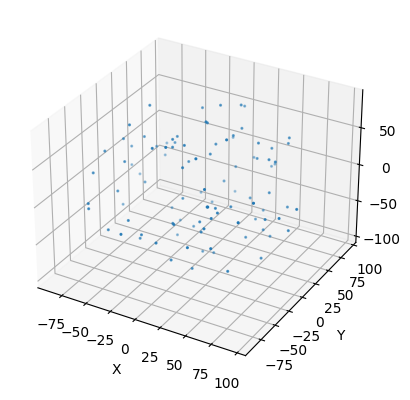

In [18]:

# 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, s=1.5,  marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()



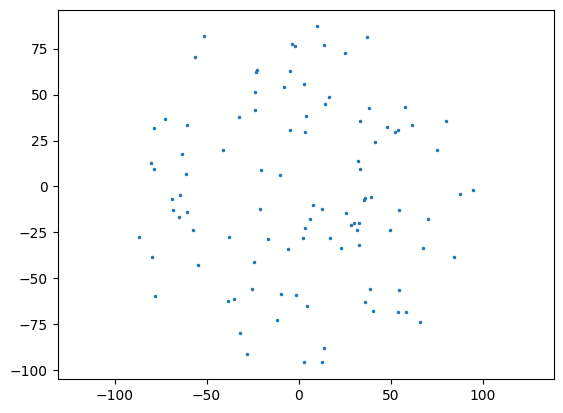

In [19]:

# 2D
plt.axis('equal')
plt.plot(x,z, marker='o', markersize='1.5', linewidth='0')



In [23]:
time=[]
mass_coord=[]
N =100
n = 0
with open("data100.out", "r") as file1:
    lines = file1.readlines()
    for line in tqdm(lines, desc="Loading data", total=len(lines)):
        data = [float(i) for i in line.split(" ")]
        if n%(2+N) == 0:
            n = 0         
        if n == 0:
            #print("particles")
            1 == 1
        elif n == 1:
            time.append(data)
        else:
            mass_coord.append(data)
        n = n+1
    

Loading data:   0%|          | 0/193494 [00:00<?, ?it/s]

In [24]:




'''
#print(len(time))
#print(mass_coord)
X=[]
Y=[]
Z=[]

t = 100

for i in range(0,N):
    i = i+(t*N)
# 2D
    plt.axis('equal')
    plt.xlim(-150,150)
    plt.ylim(-100,100)
    x = mass_coord[i][1]
    y = mass_coord[i][2]
    z = mass_coord[i][3]
    plt.plot(x,z, marker ='o', markersize='3', color='b')
    X.append(x)
    Y.append(y)
    Z.append(z)

# 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
ax.set_zlim(-100,100)
ax.scatter(X,Y,Z, s=3,  marker='o', color='b')
'''

"\n#print(len(time))\n#print(mass_coord)\nX=[]\nY=[]\nZ=[]\n\nt = 100\n\nfor i in range(0,N):\n    i = i+(t*N)\n# 2D\n    plt.axis('equal')\n    plt.xlim(-150,150)\n    plt.ylim(-100,100)\n    x = mass_coord[i][1]\n    y = mass_coord[i][2]\n    z = mass_coord[i][3]\n    plt.plot(x,z, marker ='o', markersize='3', color='b')\n    X.append(x)\n    Y.append(y)\n    Z.append(z)\n\n# 3D\nfig = plt.figure()\nax = fig.add_subplot(projection='3d')\nax.set_xlim(-100,100)\nax.set_ylim(-100,100)\nax.set_zlim(-100,100)\nax.scatter(X,Y,Z, s=3,  marker='o', color='b')\n"

In [25]:
#_______________________________________________________________________
N=100
Xt = np.zeros((N, len(time)))
Yt = np.zeros((N, len(time)))
Zt = np.zeros((N, len(time)))

for tm in range(0,len(time)):
    for i in range(0,N):
        k = i+(tm*N)
        x = mass_coord[k][1]
        y = mass_coord[k][2]
        z = mass_coord[k][3]
        Xt[i][tm]=x
        Yt[i][tm]=y
        Zt[i][tm]=z




Animating: 100%|█████████████████████████████▉| 279/280 [10:28<00:02,  2.24s/it]

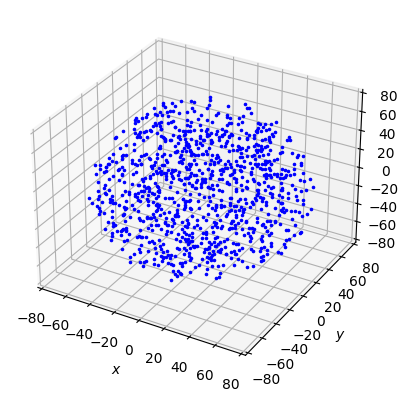

In [55]:
from tqdm import tqdm

def f_animation(num):
    #print(f"{num} ", end="")
    
    ax.clear()  # Clears the figure to update the line, point,   
                # title, and axes    # Updating Trajectory Line (num+1 due to Python indexing)
    ax.set_xlim3d([-100.0, 100.0])
    ax.set_ylim3d([-100.0, 100.0])
    ax.set_zlim3d([-100.0, 100.0])

    for j in range(0,N):
        #ax.plot(Xt[j,:num+1], Yt[j,:num+1],Zt[j,:num+1], c='blue')              # Updating Point Location
    
        ax.scatter(Xt[j,num], Yt[j,num], Zt[j,num], s=2.5, c='blue', marker='o')    # Adding Constant Origin
    
    #ax.scatter(100,100,0, s=2.5, c='red', marker='o')
    #ax.scatter(0,100,100, s=2.5, c='red', marker='o')
    #ax.scatter(100,0,100, s=2.5, c='red', marker='o')
    #ax.set_title('Trajectory \nTime = ' + str(np.round(times_array[num],decimals=2)) + ' IU')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$');

fig = plt.figure()
ax = plt.axes(projection='3d')
numDataPoints = len(time)
frames = tqdm(range(numDataPoints), desc="Animating")
line_ani = animation.FuncAnimation(fig, f_animation, interval=10, frames=frames)

# Saving the Animation
f = r"nbody_spherical_animation100.gif"
writergif = animation.PillowWriter(fps=300)
line_ani.save(f, writer=writergif, dpi=500)
#winsound.Beep(600, 1000)

In [26]:
#time[510]
len(time)

1897

In [27]:
Mtot=m*N
rho=(3/4*(Mtot/(np.pi*a**3)))
t=(3*np.pi/(16*rho))**0.5
Tcoll=t/(2**0.5)
print(Tcoll)

35.12407365520363


In [28]:
data

[10.0,
 -25.27382478852682,
 -12.89983526489526,
 -6.025278947043748,
 -4.997583032324769,
 -1.141296997272616,
 0.4492785697362877]

In [29]:
#R=[]
R=(Xt**2+Yt**2+Zt**2)**0.5

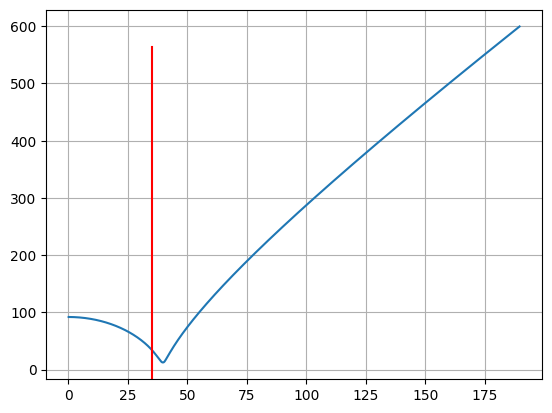

In [68]:
plt.plot(time,R[1] )
plt.axvline(x=Tcoll, ymin=0., ymax=0.9,color='red')
plt.grid()
plt.show()

In [59]:
def minimo(Np):
    ridotti=[]
    for i in range(0,400):
        ridotti.append(R[Np][i])
    mini=np.min(ridotti)
    for i in range (0,400):
        if (R[Np][i]==mini):
            return(time[i])
            

In [60]:
dist_min=[]
for p in range(0,N):
    dist_min.append(minimo(p))
len(R)

100

In [61]:
np.median(dist_min)

38.80058753959486

In [62]:
np.max(time)

189.700013649653

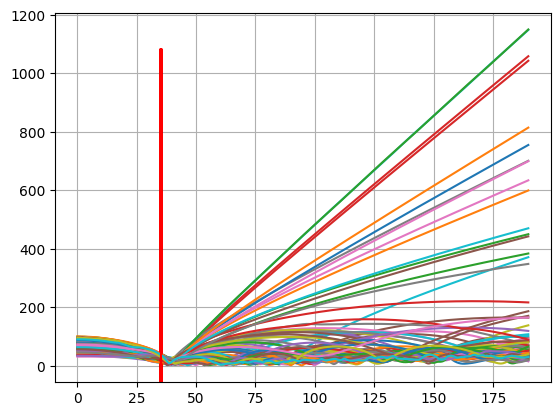

In [64]:
for i in range(0,N):
    plt.plot(time,R[i] )
    plt.axvline(x=Tcoll, ymin=0.0, ymax=0.9,color='red')
    
    
plt.grid()
plt.show()
    

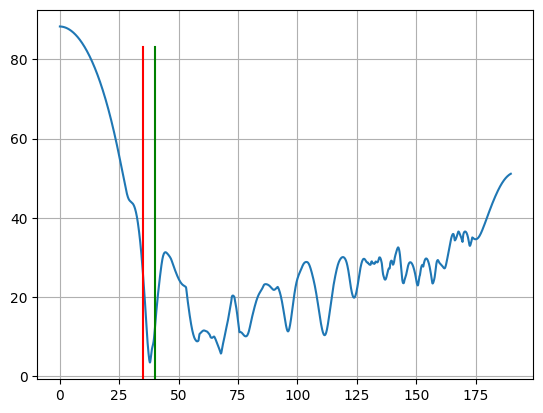

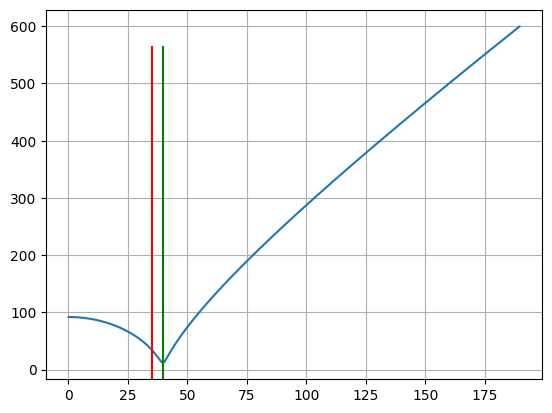

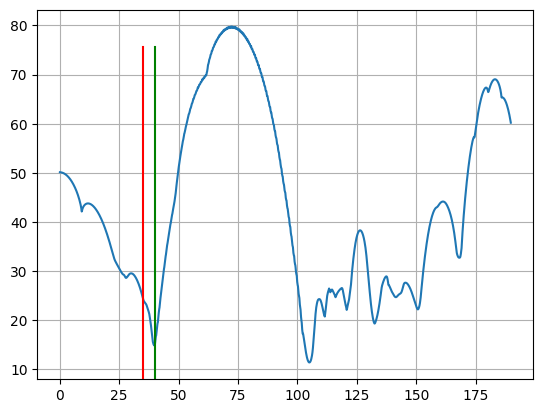

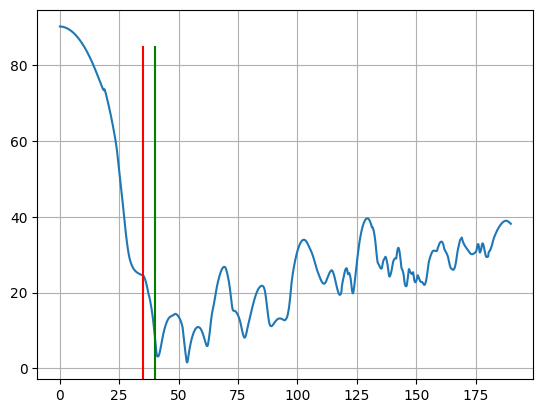

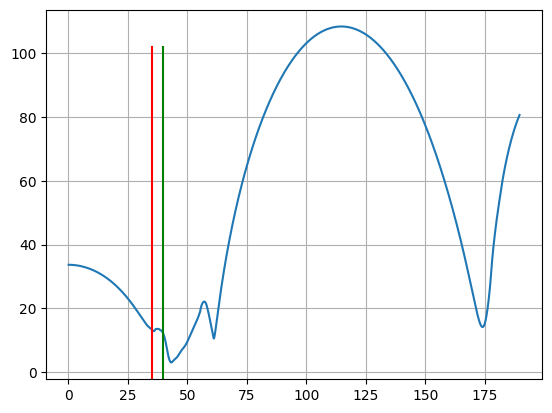

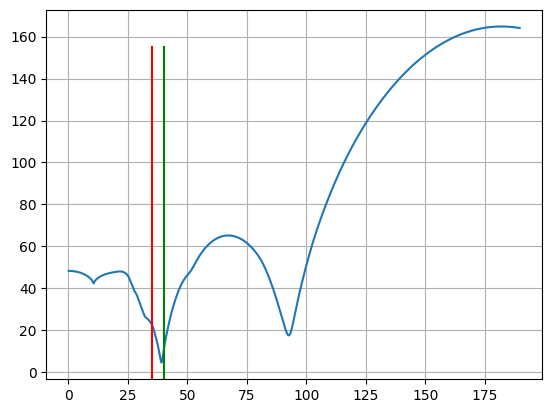

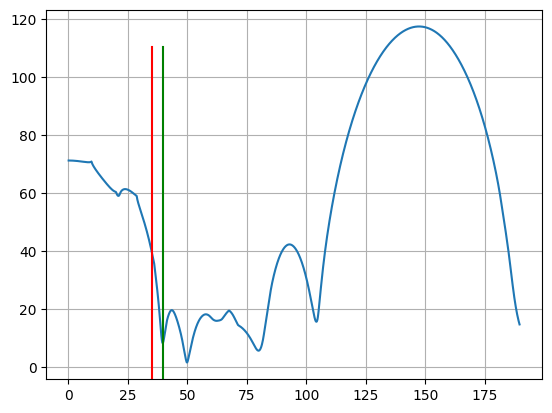

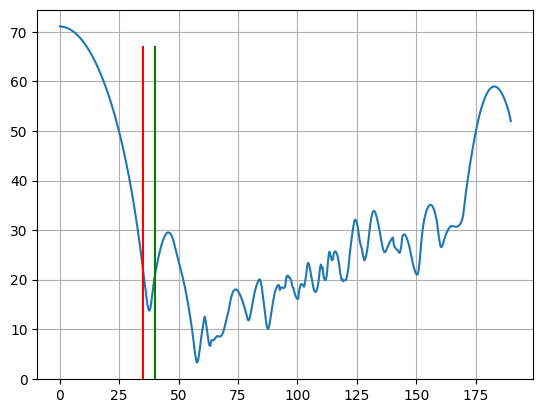

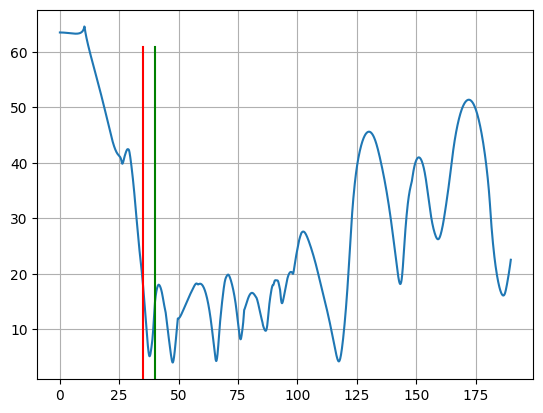

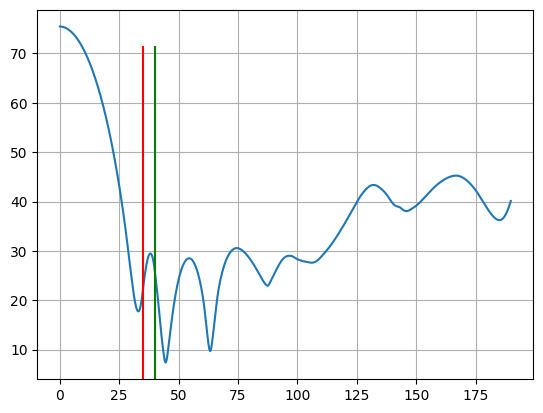

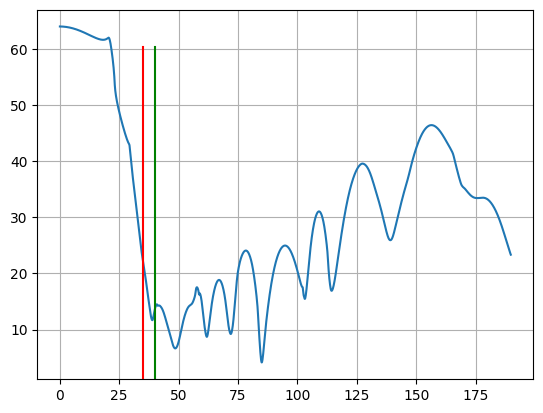

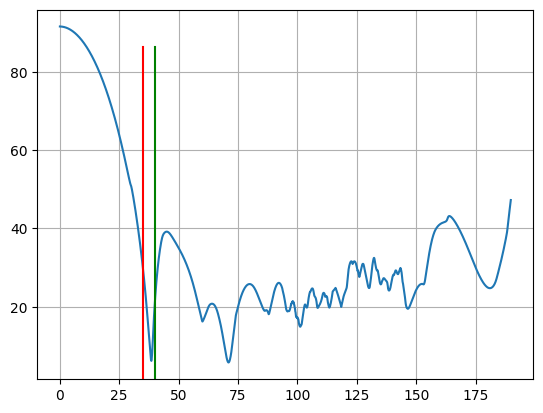

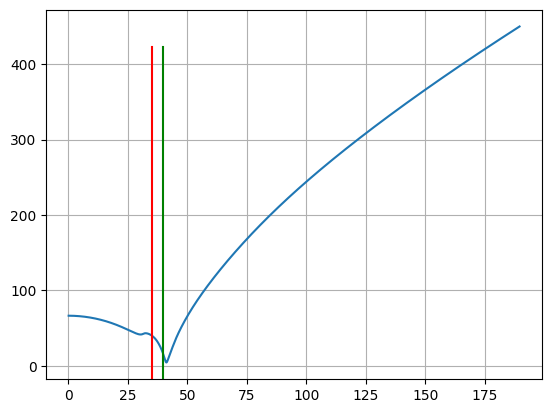

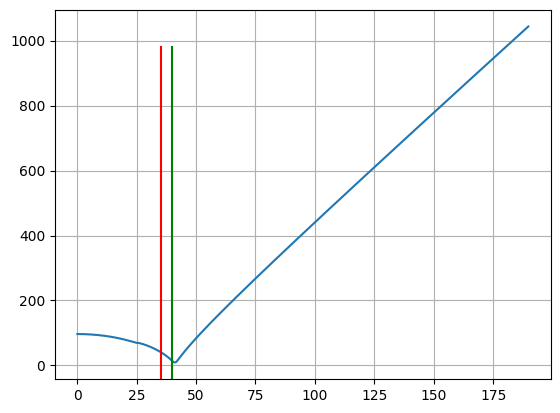

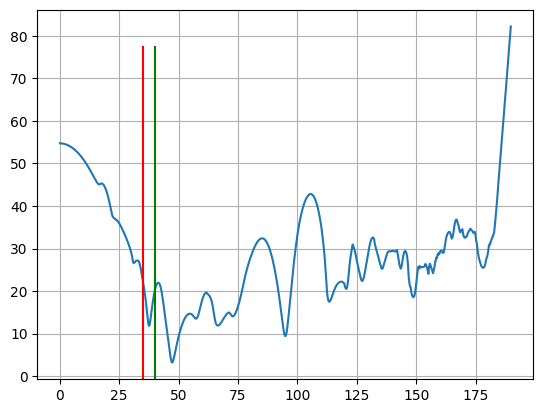

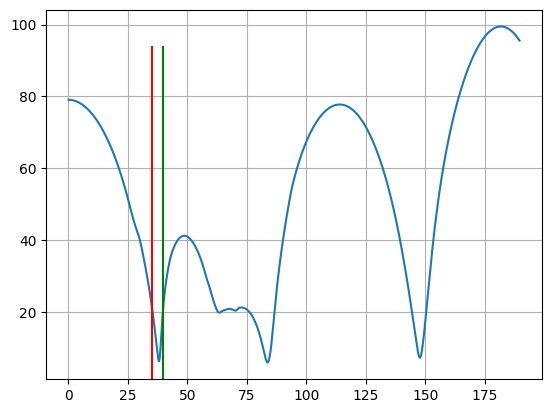

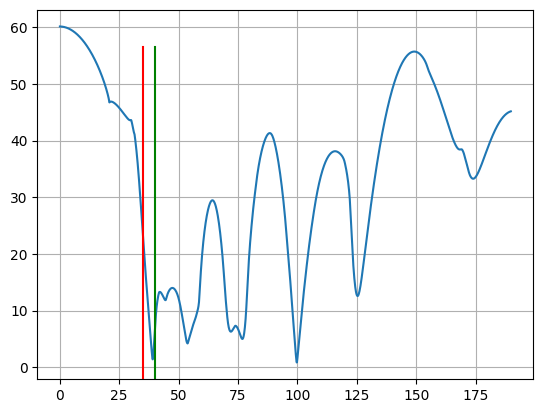

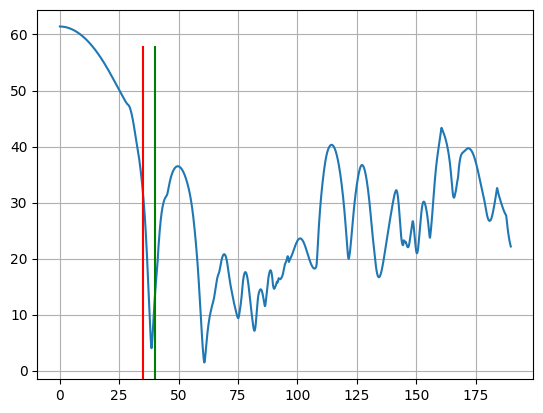

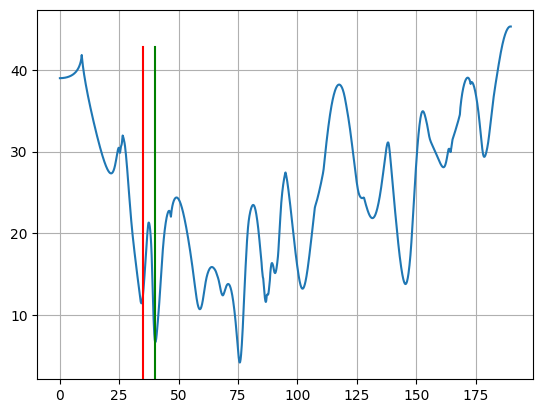

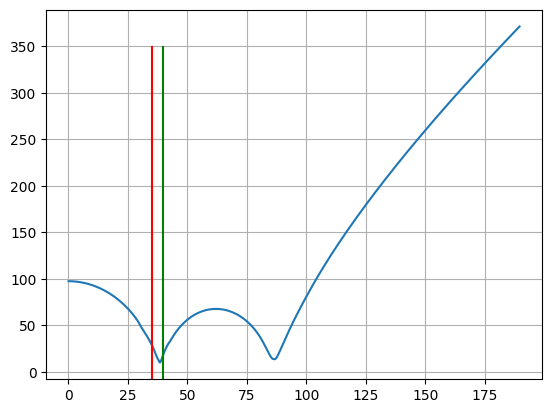

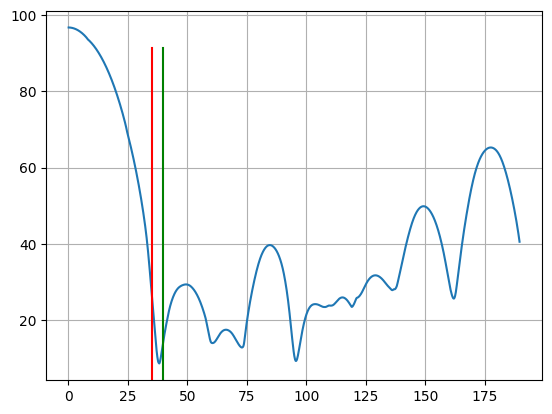

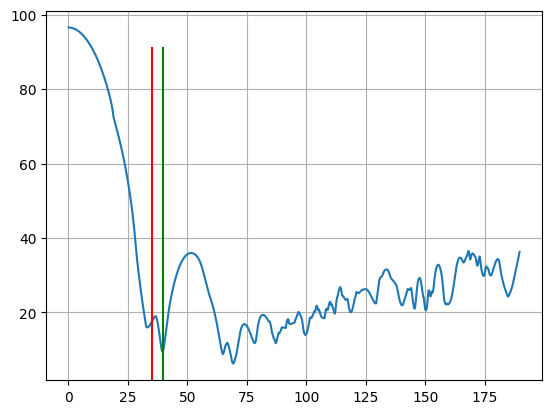

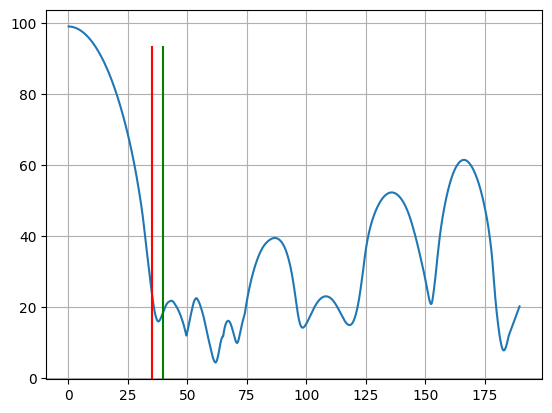

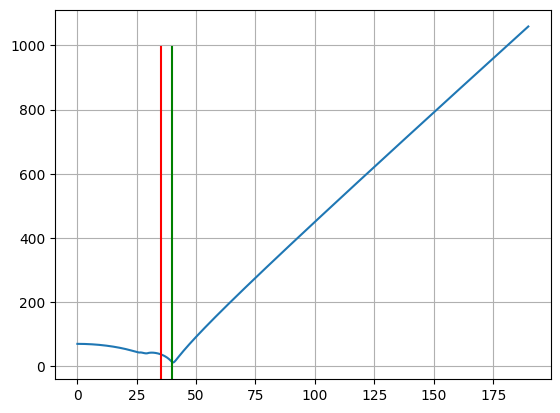

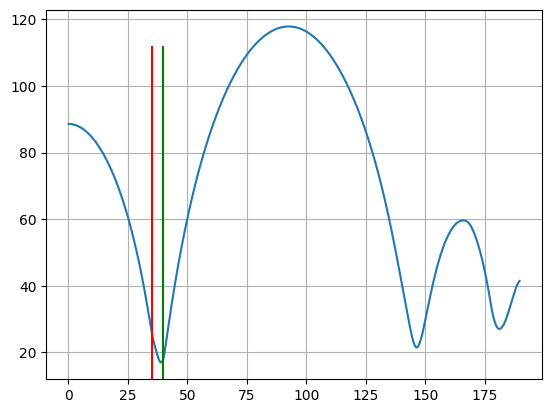

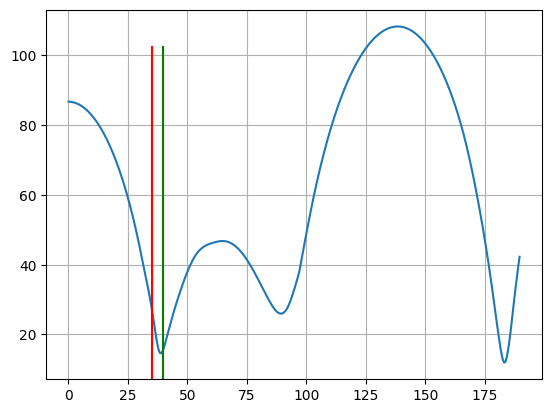

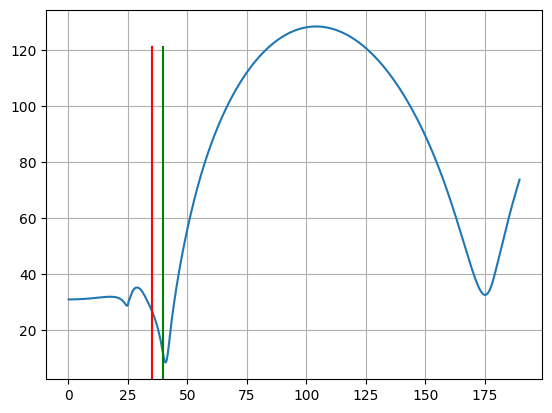

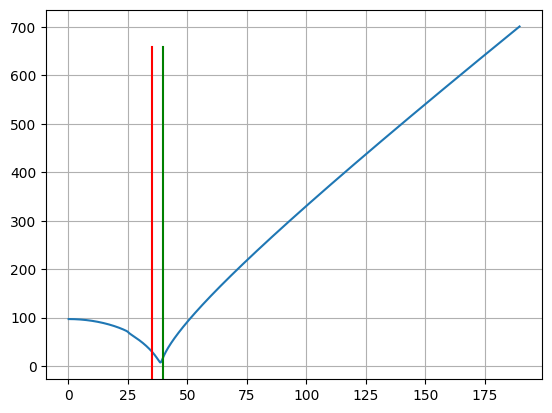

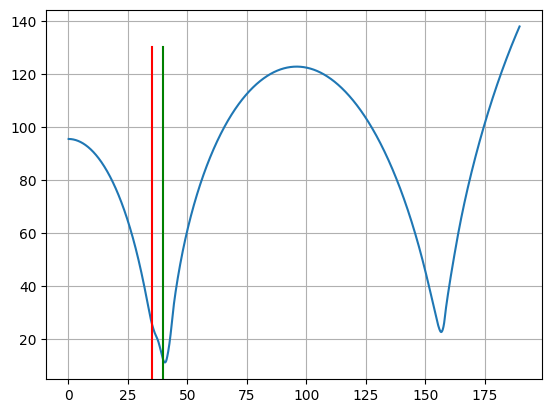

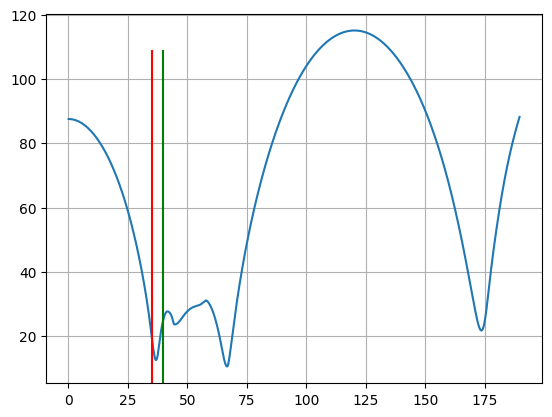

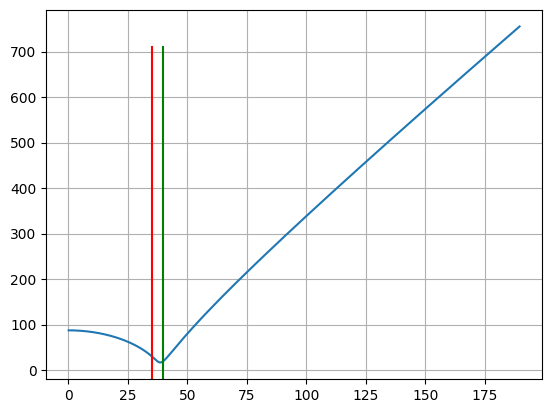

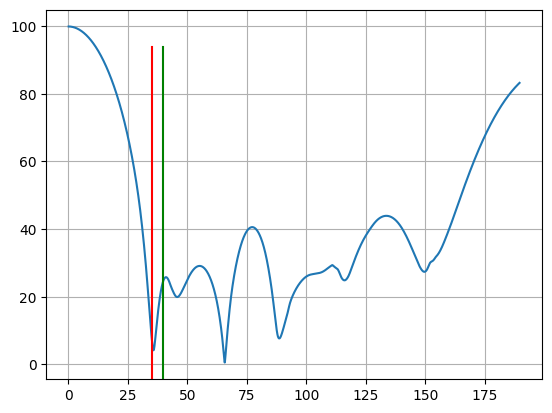

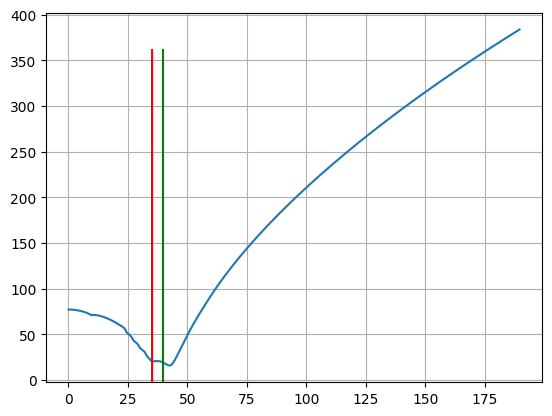

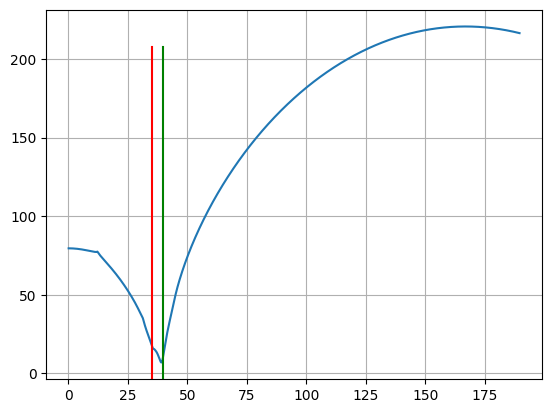

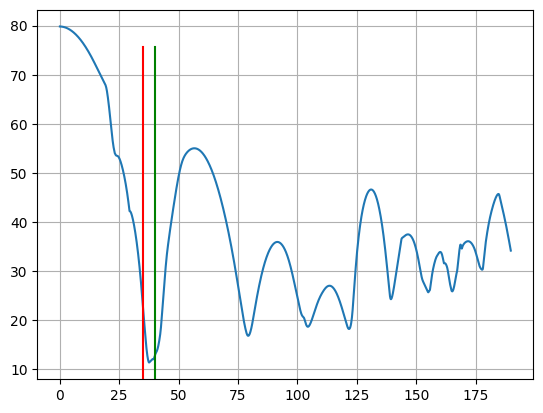

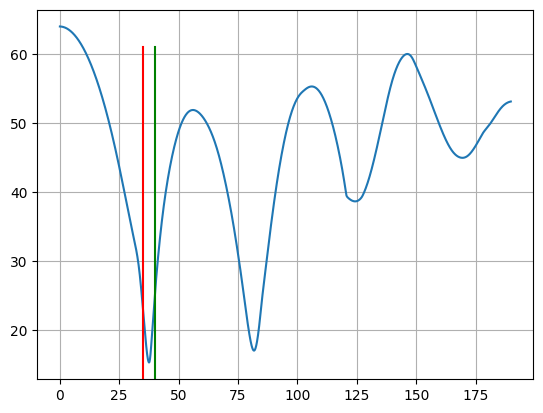

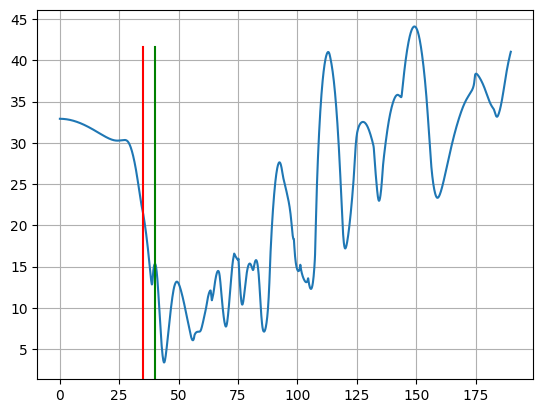

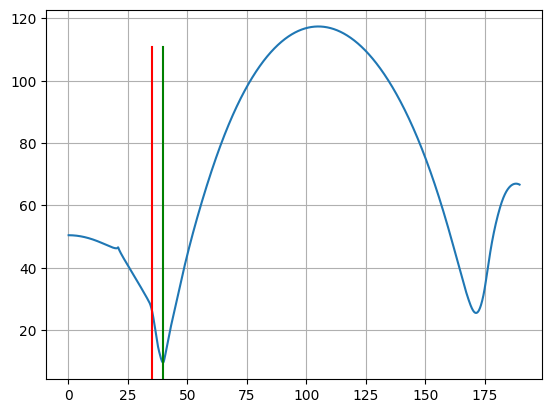

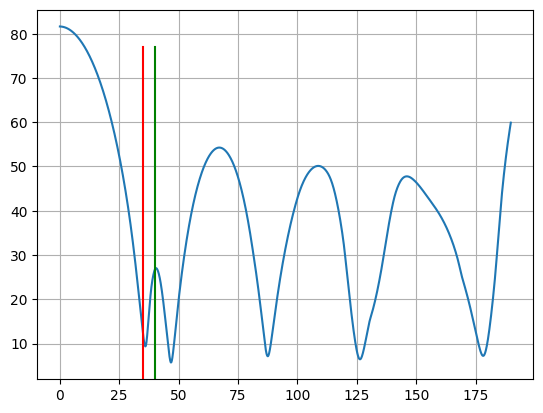

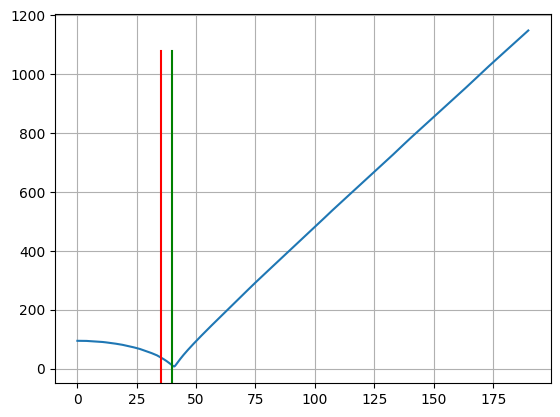

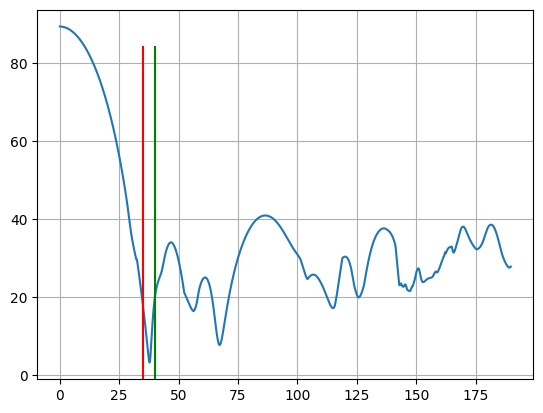

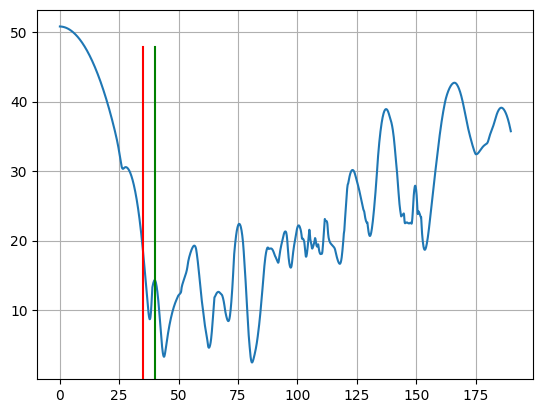

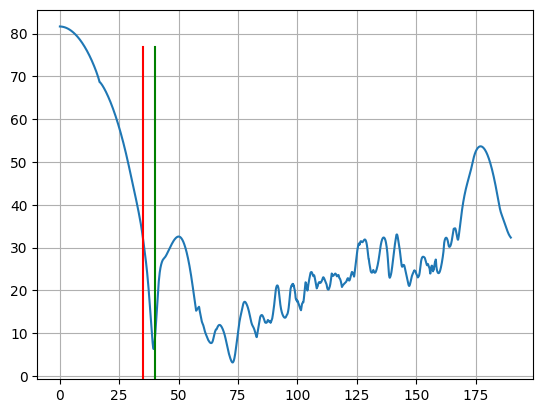

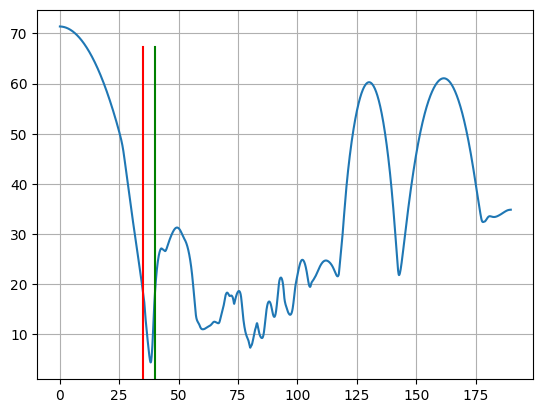

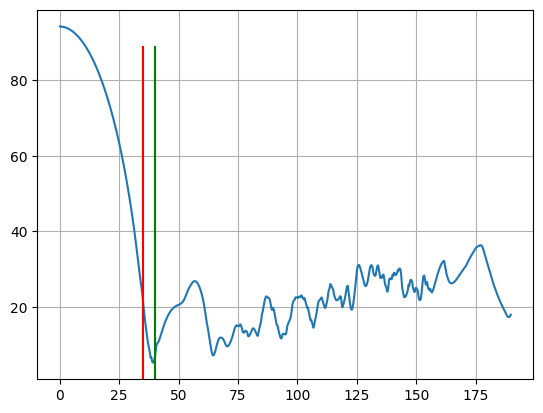

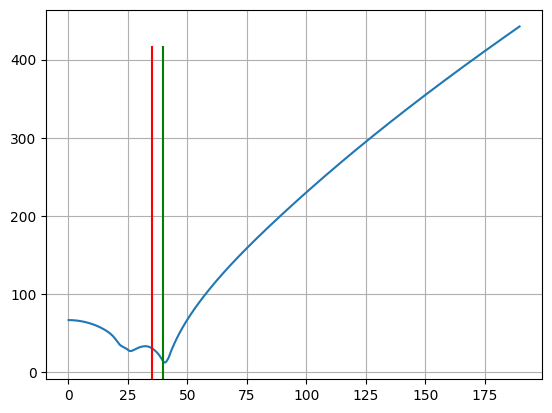

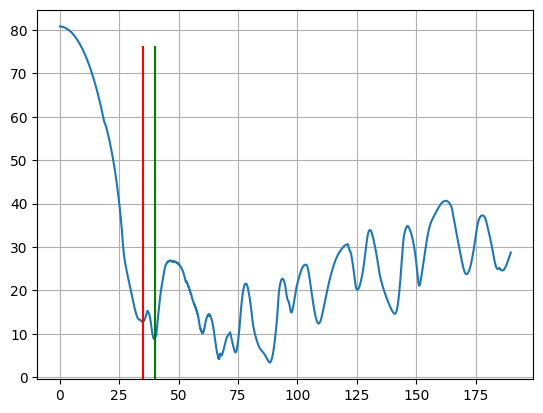

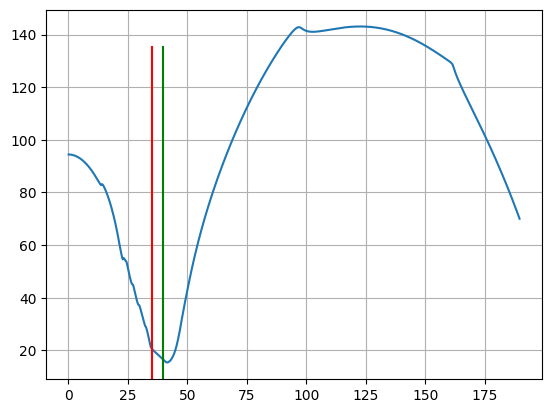

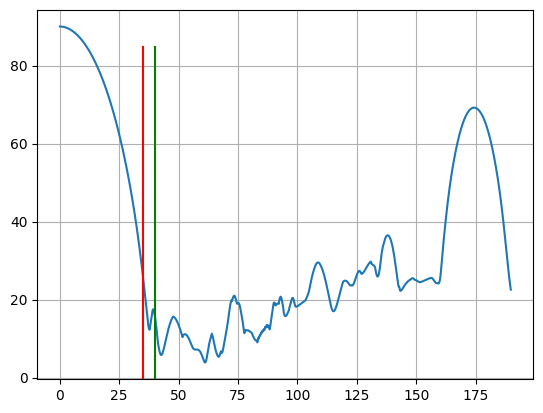

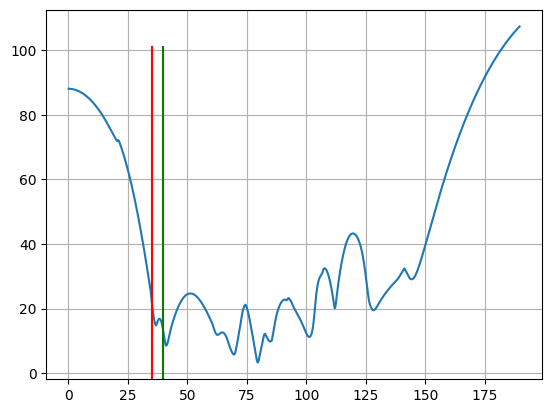

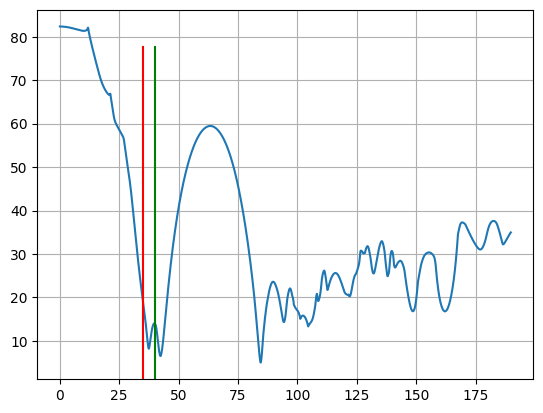

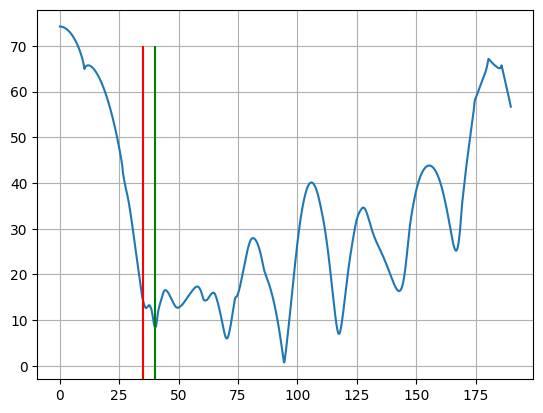

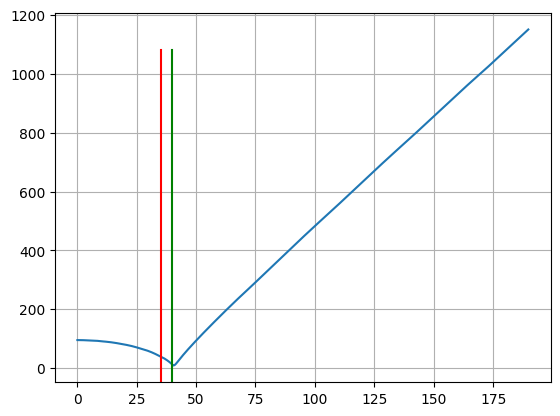

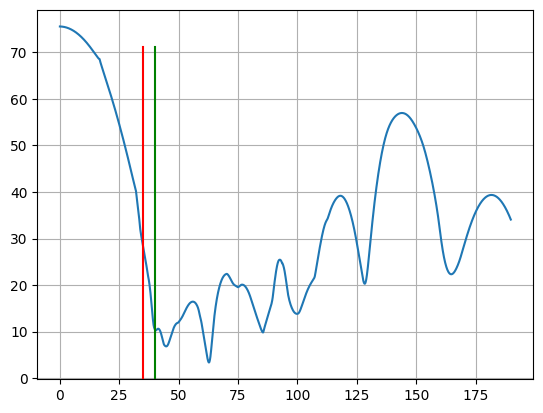

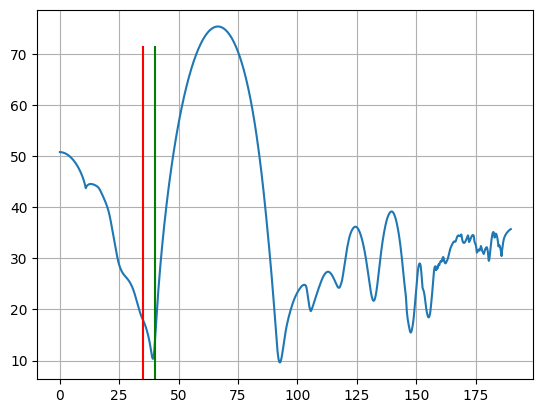

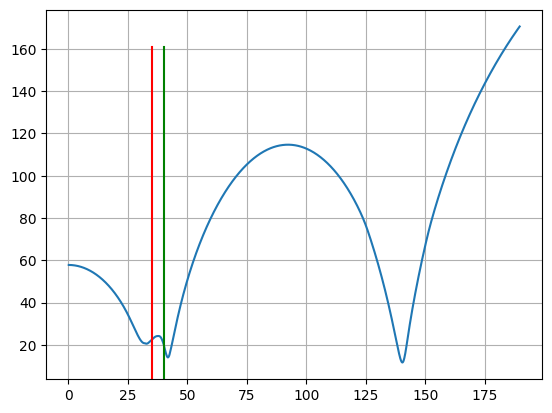

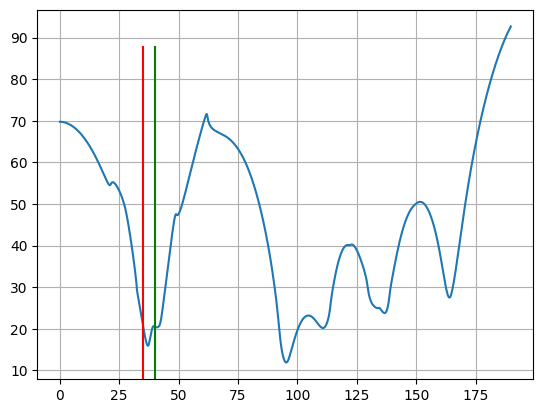

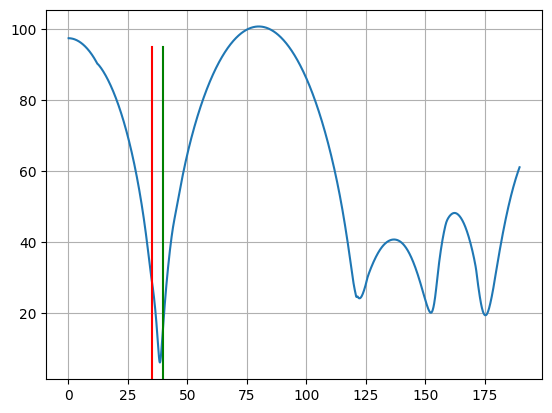

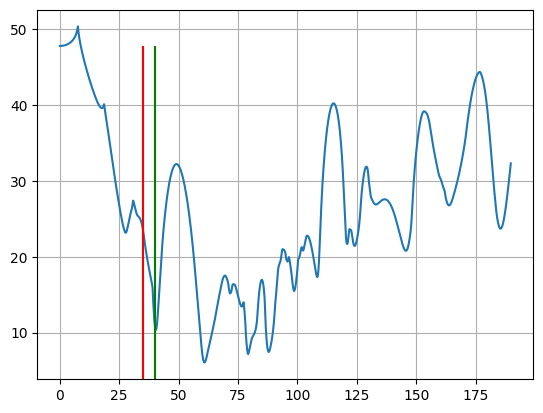

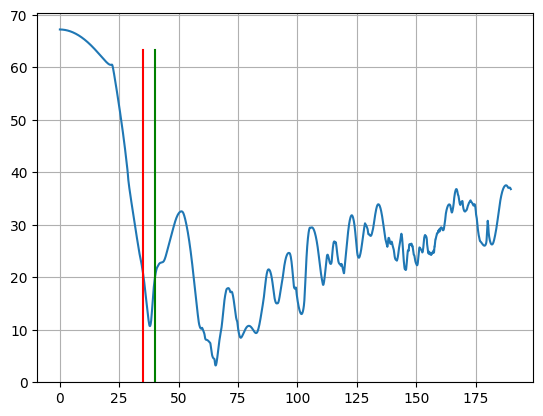

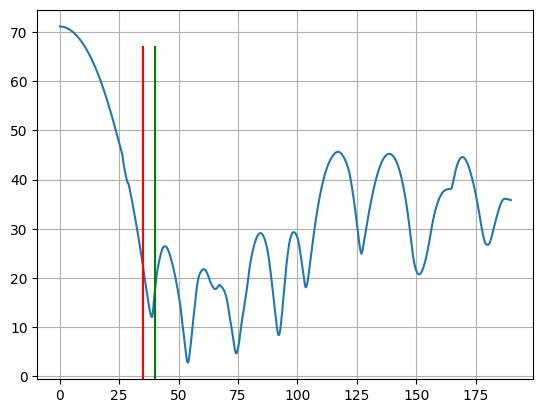

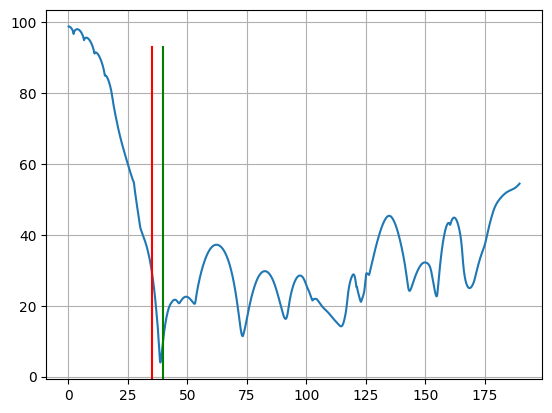

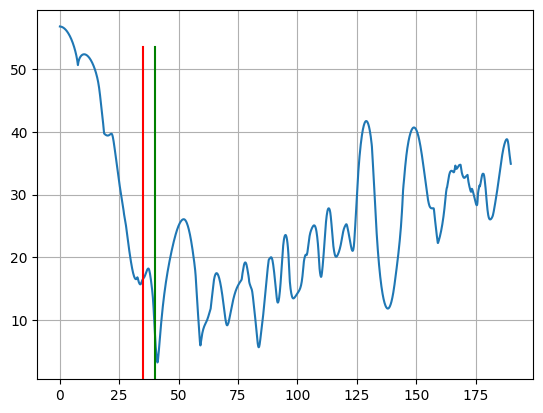

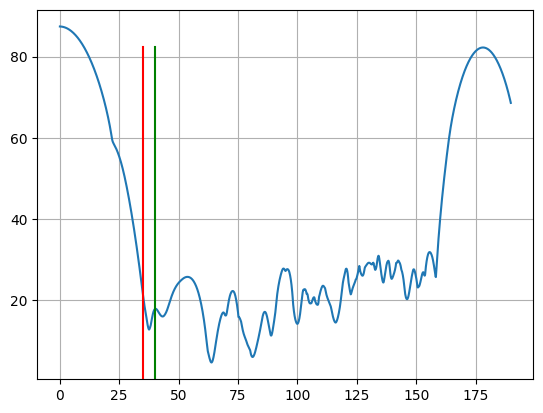

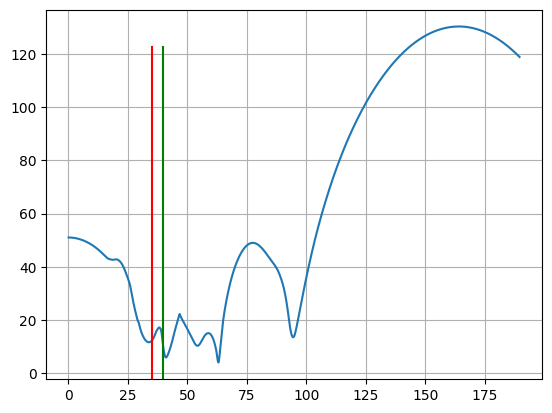

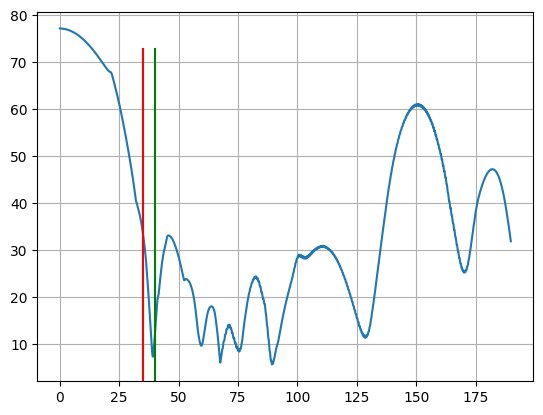

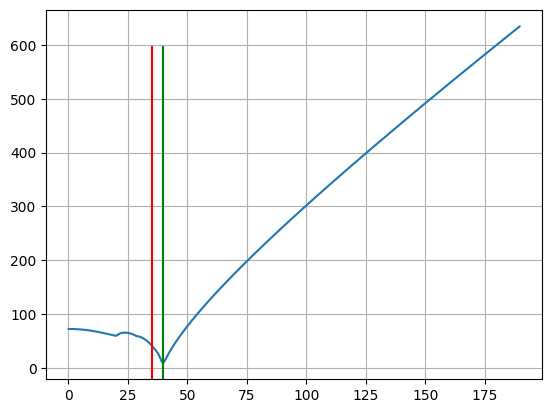

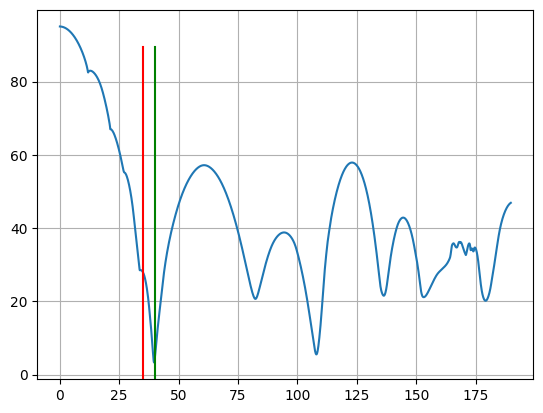

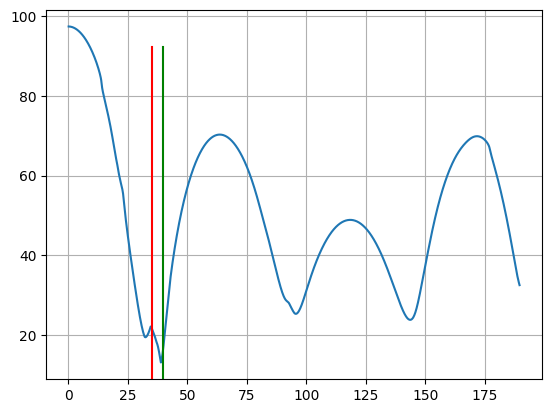

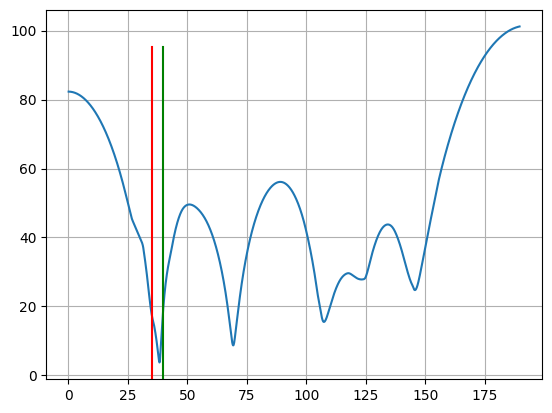

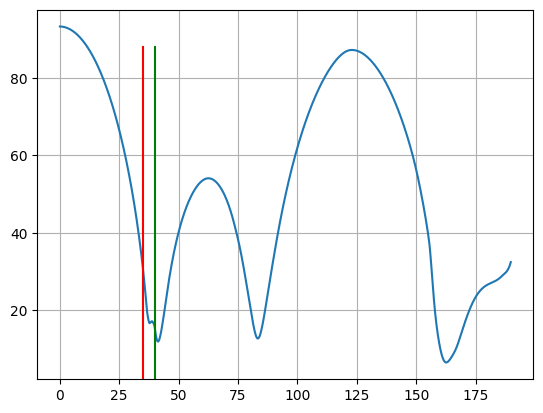

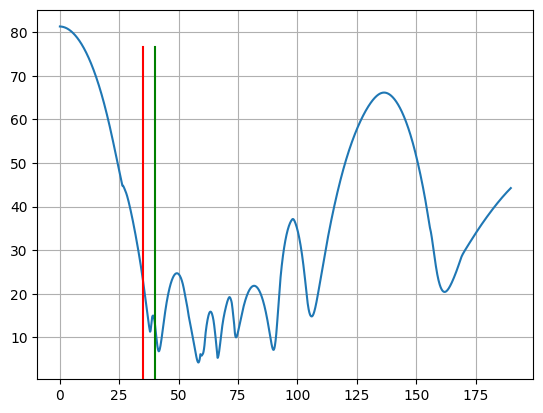

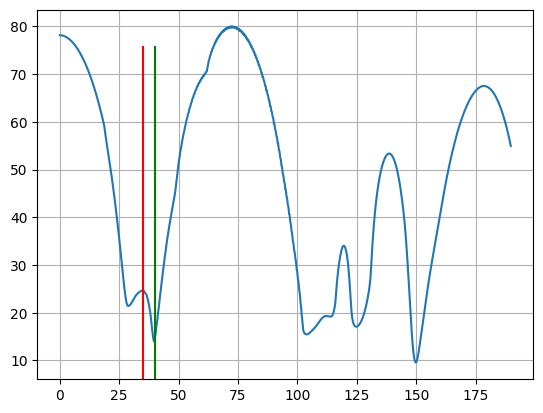

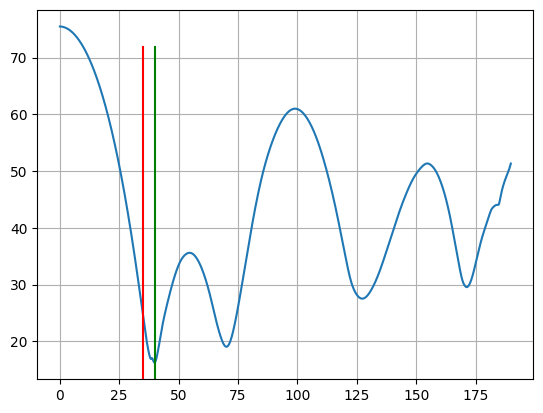

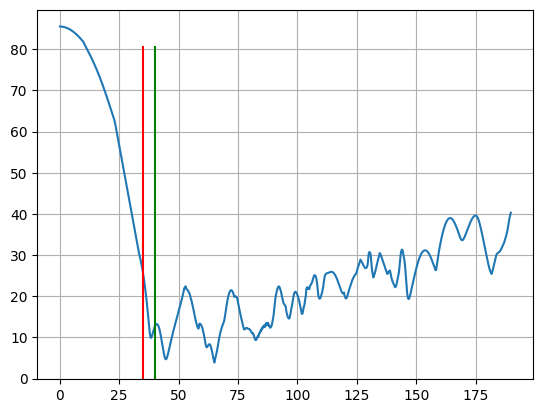

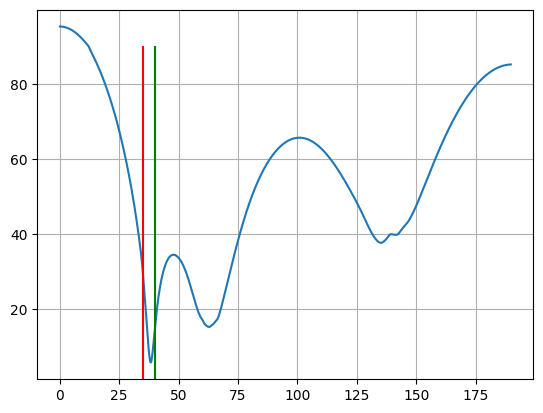

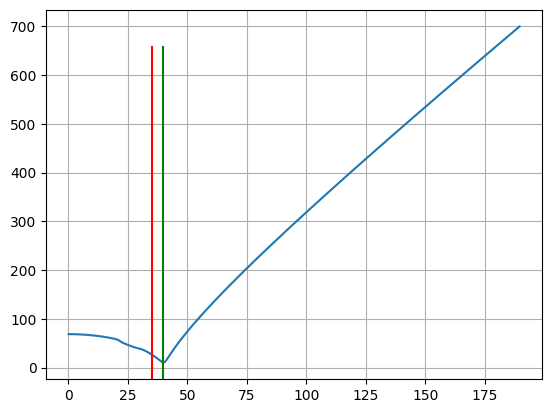

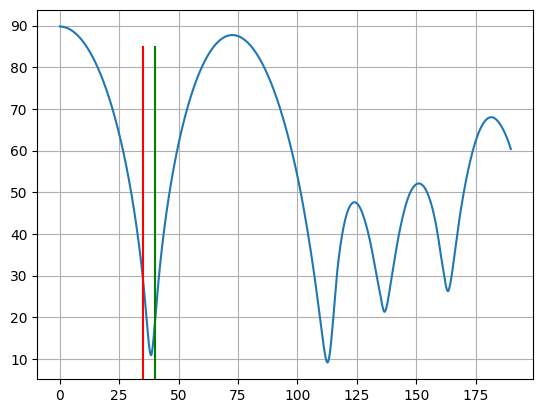

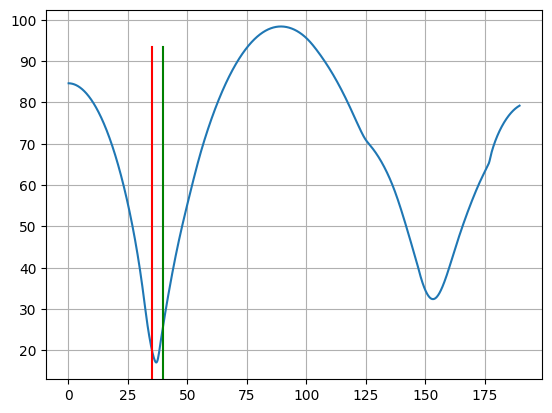

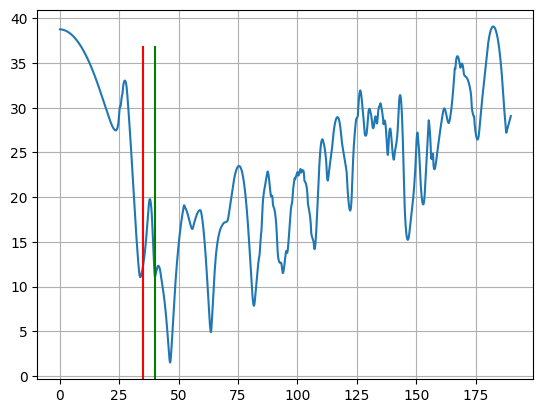

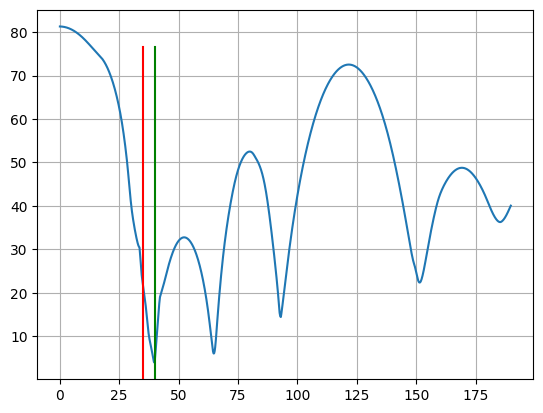

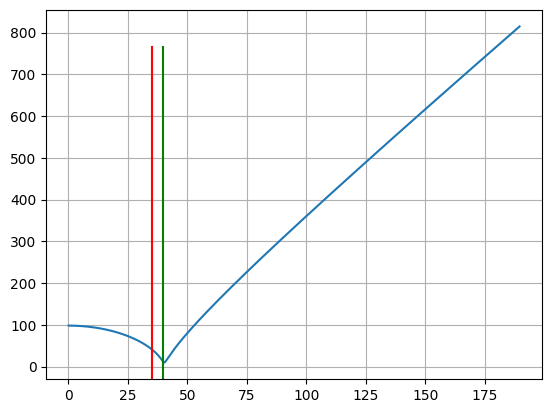

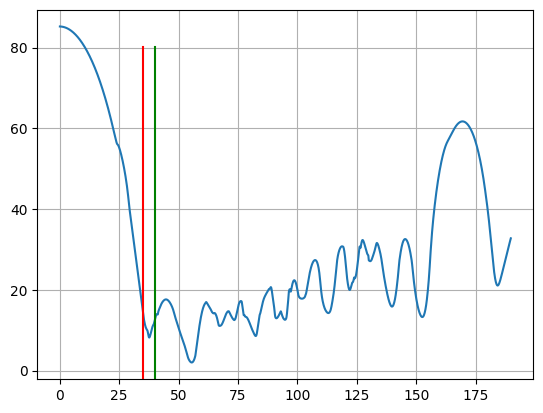

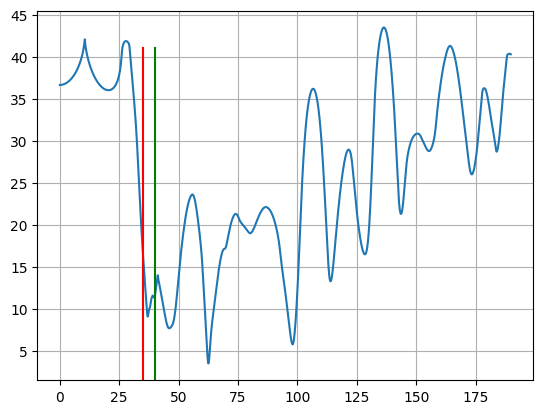

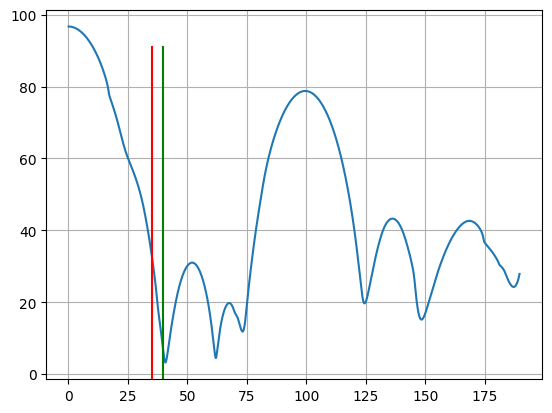

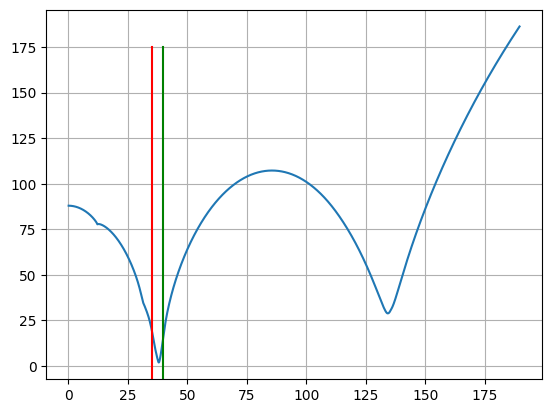

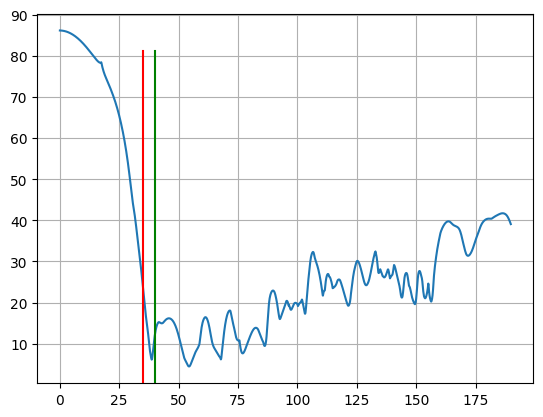

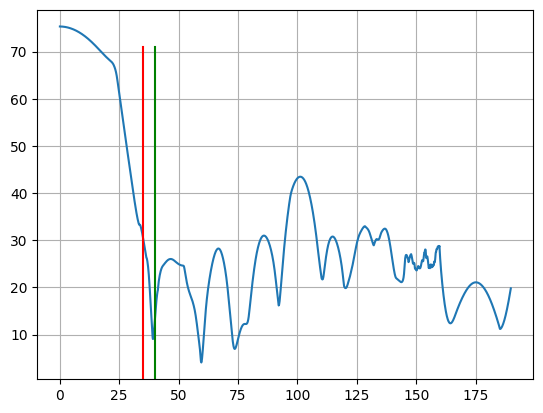

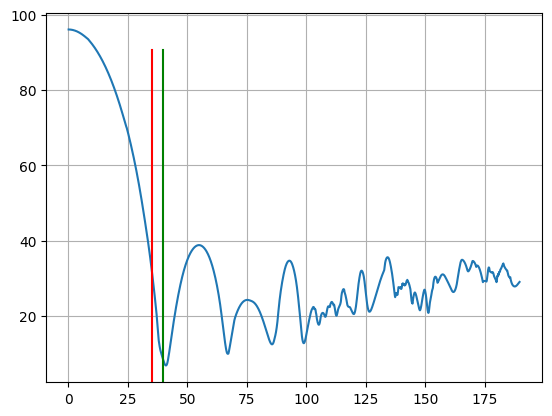

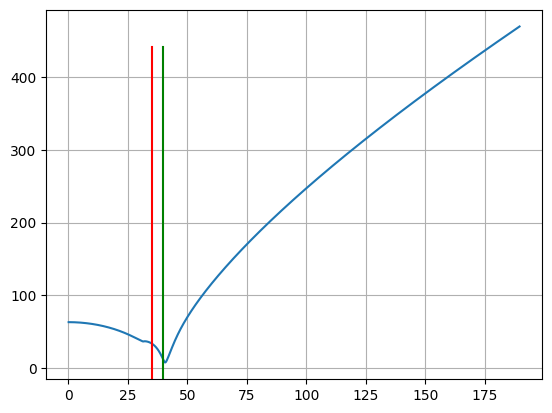

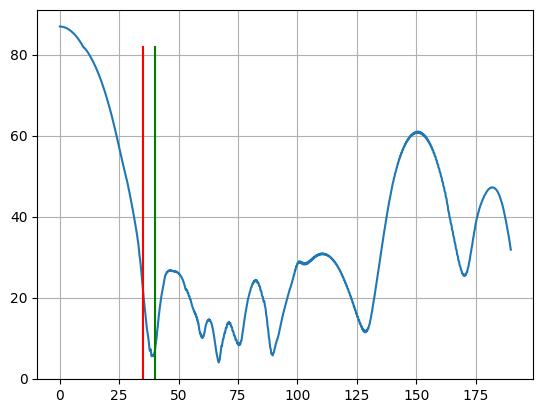

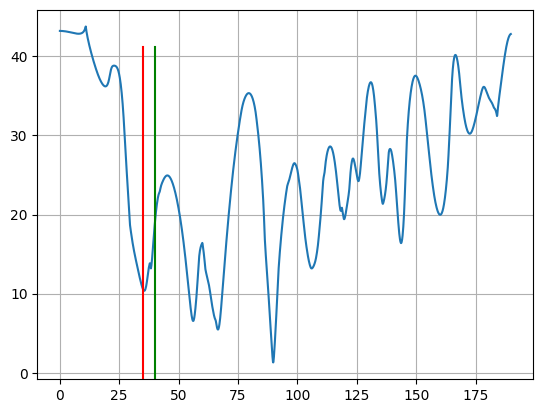

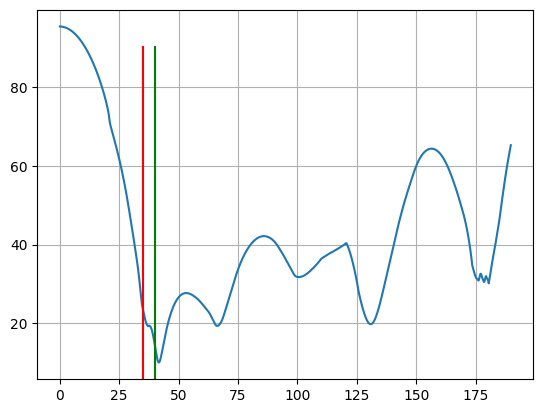

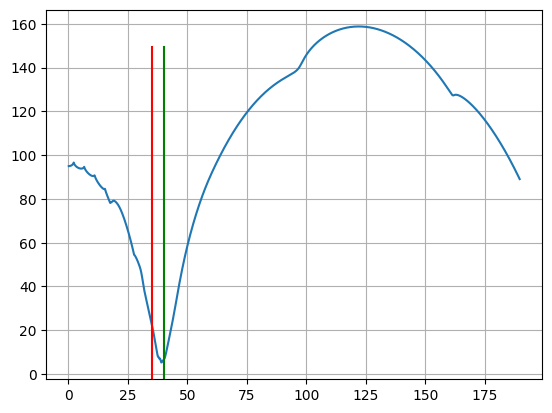

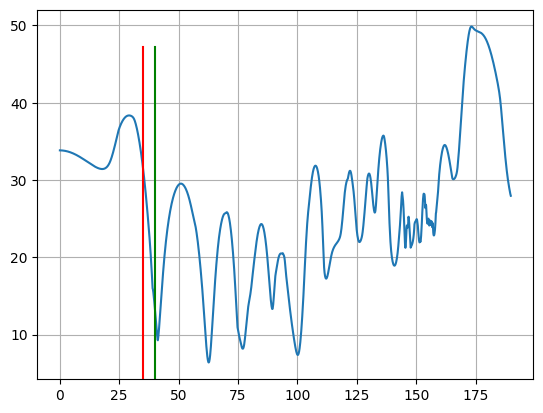

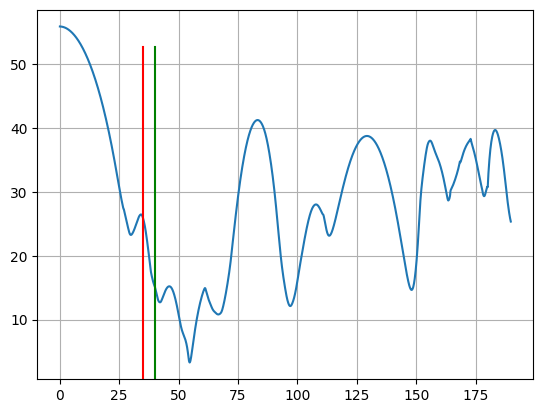

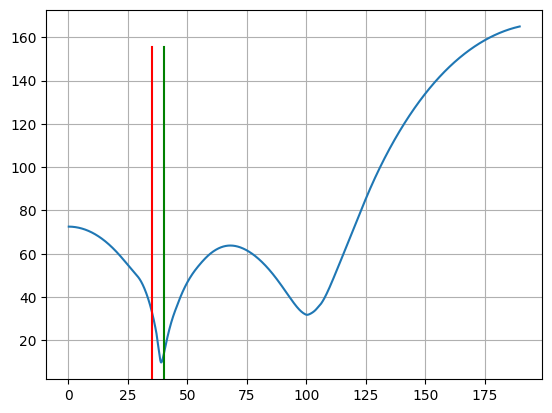

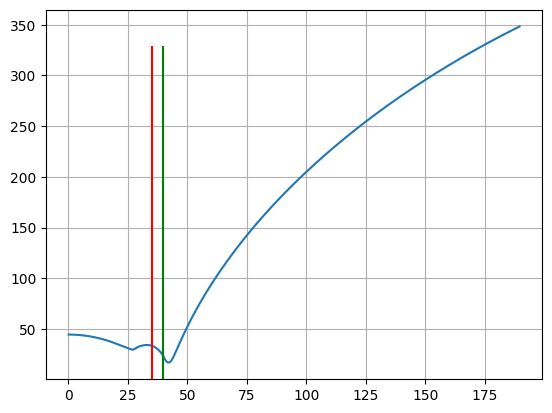

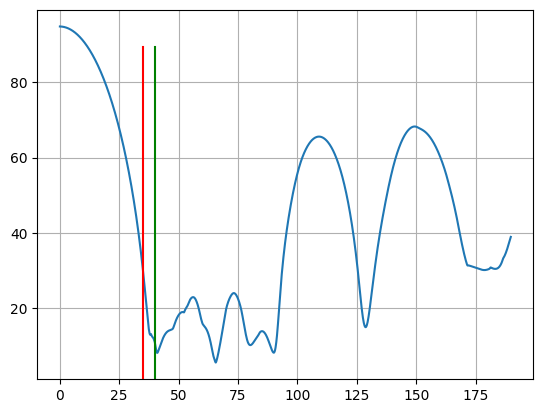

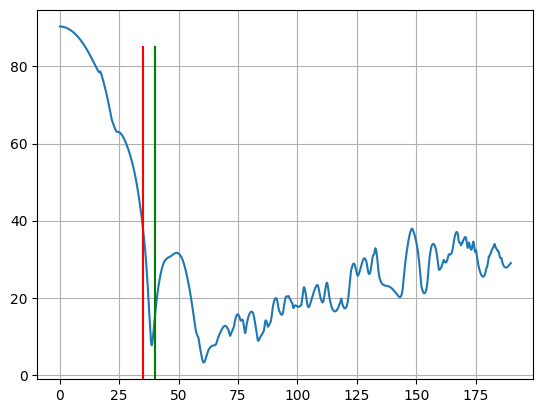

In [67]:
for i in range(0,N):
    plt.plot(time,R[i] )
    plt.axvline(x=Tcoll, ymin=0.0, ymax=0.9,color='red')
    plt.axvline(x=40, ymin=0.0, ymax=0.9,color='green')
    plt.grid()
    plt.show()
    


    
    